# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [6]:
df = pd.read_excel ('Exercise1.xlsx')

In [7]:
df.head()

,Name,Post/Share Frequently?,Active?,Replies to comments/message?,Friends/Followers,Personality
0,Mark,2,1,1,1215,1
1,Adrian,0,1,1,424,0
2,Josh,1,1,1,552,1
3,Mago,0,1,1,35,1
4,Allen,0,1,1,552,1


Display the summary of all the features of the dataset using `.info()`

In [10]:
df.drop(columns='Name', inplace=True)

In [14]:
df.head()

,Post/Share Frequently?,Active?,Replies to comments/message?,Friends/Followers,Personality
0,2,1,1,1215,1
1,0,1,1,424,0
2,1,1,1,552,1
3,0,1,1,35,1
4,0,1,1,552,1


Display the total number of samples from each label using `.value_counts()`

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Post/Share Frequently?        100 non-null    int64
 1   Active?                       100 non-null    int64
 2   Replies to comments/message?  100 non-null    int64
 3   Friends/Followers             100 non-null    int64
 4   Personality                   100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

In [15]:
df['Personality'].value_counts()

,count
Personality,
1,76
0,24


Remove the name column using `drop()` method

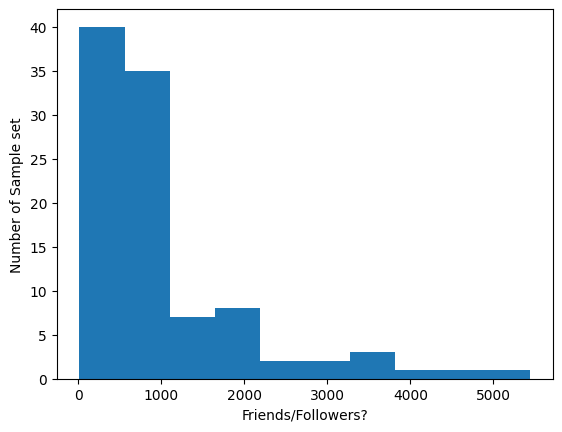

In [19]:
plt.hist(df["Friends/Followers"])
plt.xlabel("Friends/Followers?")
plt.ylabel("Number of Sample set")
plt.show()

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [21]:

X = df.drop(columns=['Personality']).values
X

array([[   2,    1,    1, 1215],
       [   0,    1,    1,  424],
       [   1,    1,    1,  552],
       [   0,    1,    1,   35],
       [   0,    1,    1,  552],
       [   0,    1,    1, 1100],
       [   9,    1,    1,  392],
       [   2,    1,    1, 4500],
       [   4,    1,    1,  411],
       [   6,    1,    1, 1239],
       [  10,    1,    1, 2021],
       [   2,    1,    1, 2900],
       [   3,    1,    1,  245],
       [   1,    1,    1,  267],
       [  23,    1,    1,  300],
       [   1,    1,    1,  232],
       [   0,    1,    1,  134],
       [  13,    1,    1,  493],
       [  35,    1,    1, 1103],
       [   9,    1,    1,  295],
       [   7,    1,    0,  535],
       [   1,    1,    0,  521],
       [   6,    1,    1,  537],
       [   6,    1,    1,  403],
       [   0,    1,    1,  126],
       [  10,    1,    0,  874],
       [   5,    1,    1,  818],
       [   7,    1,    1,  172],
       [  16,    1,    1, 2026],
       [   0,    1,    1,  639],
       [  

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [22]:
y = df["Personality"].values
y


array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82, 4)
(82,)
(18, 4)
(18,)


Display the dimensions of each variables using `.shape()`

In [24]:
df.shape

(100, 5)

## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [40]:
knn = KNeighborsClassifier(n_neighbors=7)

Train the model using the `.fit()`

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Test the model using the `.predict()`

In [27]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

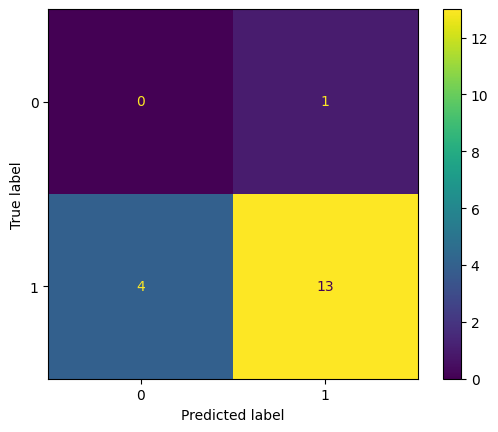

In [28]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [29]:
metrics.accuracy_score(y_test, y_pred)

0.7222222222222222

Display the precision

In [30]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.         0.76470588]


Display the recall

In [31]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.         0.92857143]


Display the f1-score

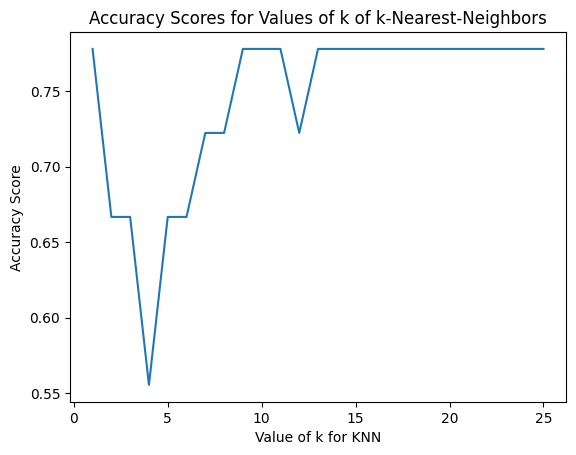

In [32]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [33]:
knn.predict([[1, 1, 300, 0]])

array([1])